# Feedback Circuit Simulation

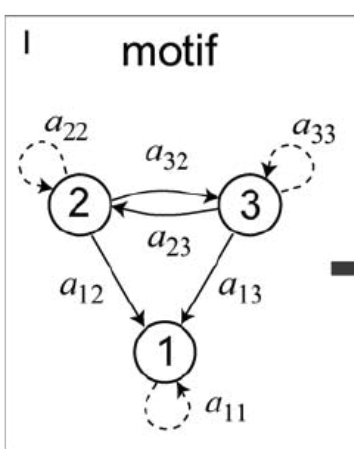

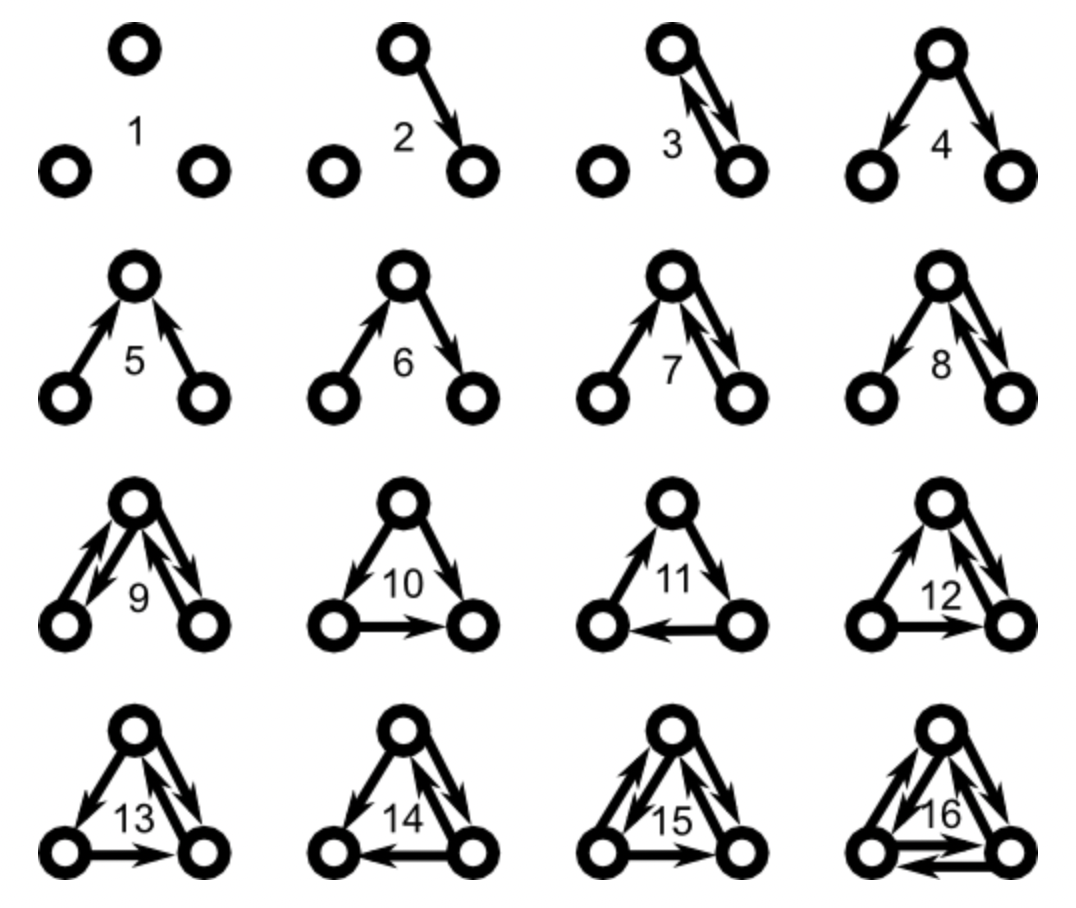

```
* Each node has its own dynamic - e.g. AR
```
```
* Each interaction has its own dynamic - e.g. OU or PID
```
```
* Feedback is modeled by mutual coupling between two or more regions 
    * Instead of adding the input signal with the feedback signal, the signal fed back into the input is coupled with the input
* Delay between regions 
    * Single time point (ODE) 
        * Assume delay between region is too short to be captured in dt
    * Or defined time delay (DDE) 
        * See example below; \tau_B determine the delay between ROIs
        * e.g. \tau_BX > \tau_BY → X affect Y first and Y feedback X
    * Or this can be modeled by the B(t) but this is under the assumption of B(t) depends on X(t)
        * Assume there is a threshold then we don't have to model it explicitly (not continuous change)
        * Might consider adding it to the simulation (this overlap with the stimulus so might not) 
```
```
* How do we want to model stimulation?
    * See example below; Stimulus affecting B(t) or Y(t)/X(t)?
        * B(t): the coupling is changed by the stimulus 
        * Y(t)/X(t): the regions are changed by the stimulus
    * Assume the stimulus is affecting the rois and coupling in different ways (should add a u(t) term in the B(t) in the example below)
        * Different regions are activated 
        * Different networks are dominating 
```
```
* Do we want the interaction between node and interaction? 
    * Activation/Inhibition
```
```
* Consider if these parts are necessary for the simulation
    1. \tau in the AR term - see how different things look like
    2. Intervention - depends on the purpose of the simulation. feedback or more complicated coupling 
```

\begin{equation*}
dY(t) = \sum_i^t\theta_{Yi} Y(t-\tau_{Yi})dt + B_{XY}(t)X(t-\tau_{BX}) dt + D_{XY}(t)u(t) + dW(t)\\
dX(t) = \sum_i^t\theta_{Xi} X(t-\tau_{Xi})dt + B_{YX}(t)Y(t-\tau_{BY}) dt + D_{YX}(t)u(t) + dW(t)\\
dB_{XY}(t) = -\theta_{BX} (B_{XY}(t) - \mu_{BXY})dt + \sigma dW(t) \\
dB_{YX}(t) = -\theta_{BY} (B_{YX}(t) - \mu_{BYX})dt + \sigma dW(t) \\
dD_{XY}(t) = dW(t) \\
dD_{YX}(t) = dW(t) \\
dW(t) \sim N(\mu, \sigma)
\end{equation*}

X(t): Signal in the input ROI \
Y(t): Signal in the output ROI \
B(t): Coupling between X(t) and Y(t) \
D(t): Coupling with intervention (stimulus) \
W(t): Brownian motion

## References 
[1.](https://mathinsight.org/image/three_node_motifs)
```
Possible network motifs involving 3 nodes 
```
[2.](https://www.researchgate.net/publication/355472071_Interpreting_the_Entire_Connectivity_of_Individual_Neurons_in_Micropatterned_Neural_Culture_With_an_Integrated_Connectome_Analyzer_of_a_Neuronal_Network_iCANN)
```
Neuronal networks by network motifs with 3 ndoes
```

In [4]:
# Math
import numpy as np
import random

# Solvers
from ddeint import ddeint
from scipy.integrate import solve_ivp

# Printing equations
from sympy import *

# Plotting 
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from jitcdde import jitcdde, y, t
from numpy import pi, arange, random, max
from symengine import sin

In [4]:
n = 100
ω = 1
c = 42
q = 0.05
A = random.choice( [1,0], size=(n,n), p=[q,1-q] )
τ = random.uniform( pi/5, 2*pi, size=(n,n) )

In [10]:
def kuramotos():
    for i in range(n):
        yield ω + c/(n-1)*sum(
            sin(y(j,t-τ[i,j])-y(i))
            for j in range(n)
            if A[j,i])
        
I = jitcdde(kuramotos,n=n,verbose=False,delays=τ.flatten())
I.set_integration_parameters(rtol=0,atol=1e-5)
I.constant_past(random.uniform(0,2*pi,n), time=0.0)
I.integrate_blindly(max(τ), 0.1)


clang: error: the clang compiler does not support '-march=native'


AssertionError: 

In [11]:
for time in I.t + arange(0,400,0.2):
    print(*I.integrate(time) % (2*pi))

2.4839576665177545 4.4309381883028625 0.5469762997166611 0.6494421305900926 3.0447755306672315 2.677397734156776 4.593451910907265 0.16899782870112243 3.6996848618518405 0.7230594871756736 0.866103803906044 1.7949142570315024 0.8941437722229834 4.753228605674469 2.069945723003027 0.9983990441808771 5.820852070923545 0.8334773251490641 4.862831919612166 0.47750781792382946 4.238453486738944 6.212717064577512 3.61848293602711 4.084791792435772 4.367498731169766 4.429657520541314 3.8367537447646045 2.3491468897176477 2.63660461788046 0.8169798122002515 3.4879428786909794 5.228435080779774 2.016771805054229 2.4549234984863633 0.6781049908179969 3.345948972150742 4.523817849253662 4.371432684345767 1.6827806477878016 4.276948965964561 3.732107562446568 1.287037215433096 4.002520068296148 3.4991422646306063 1.1002039189314896 5.2795988622630095 1.2448476621669358 5.2744237293358 4.758939672156098 5.431565128289827 4.7121550108538495 0.07128881175659388 5.148571727288521 6.196407778602649 3.9

1.3160939051890779 4.732756037312267 5.457867774988503 5.1121709020660395 1.0680380649367862 4.9972787330067785 4.219523995415873 1.4863866506525838 4.456262234507076 4.166548200317229 0.38926228787837847 5.299744116451863 5.027182199403605 3.310128268844208 4.45514623271703 5.328216327740731 6.1787357015352455 3.819469881877901 5.344565518984089 5.403218126783109 5.222407848665258 5.2839077795670235 3.8678533674800692 4.883946850187439 3.564012499163809 3.003279131028206 4.333295379979662 0.42786322739786176 3.550340593331006 1.3134738746516401 5.816352398776194 6.281581561838058 6.059202675882776 0.5779937485201501 2.0239767422026826 5.0577444144159 0.562544441049365 3.78409927454725 3.3929166625293554 5.847968198211259 0.6840763756614168 5.559105028683336 3.6936594768360163 0.7948661117419791 0.7802296523676562 4.546568332824089 5.507241581731185 2.0959599236160766 0.6029838162596368 3.483976092935473 1.6310599748705066 5.2171859982562045 4.6773670349060605 2.985709675563566 1.75414

5.246132430388396 4.251549355505187 2.6891537024195014 3.9917455850622012 1.5263845952053323 2.9472937286815135 0.6370717008859508 1.5194200919434309 0.22306305272040738 2.660409805821967 3.9659360882566688 3.404400021695274 4.281655915614476 3.240532728011262 3.3223576660755434 3.5755702800438023 1.3220856623291013 3.3089786905282903 4.63267152279445 2.9759159854234287 2.2870429885749815 3.562008653558145 3.737320468468747 4.6197610553600885 1.6309157143883546 2.0440602915937447 2.658460173173591 3.3579596092971045 4.835848539095107 4.598070063923618 5.485598229364456 4.999572777128208 5.835309665261814 1.1824052478489406 0.8814638936315511 1.3742146808368325 0.23900290814480485 2.8100924047158955 2.533502459492805 6.093305903329355 4.782426675355708 1.838206540752136 3.4731582057097583 5.562532571162125 4.6646084209821375 3.251486918565643 3.831022789257993 3.813711657416931 1.2949580759904187 2.4848509434725123 2.4924694502102778 2.1247577211808046 2.565516246367153 2.79045952462006

5.492805143966166 3.455163070214617 3.1052154690115685 2.544558797468099 1.2033520940019677 6.132406051583153 4.824192922910502 0.7464210364698509 4.475521861540855 1.5421140928475765 1.2366244395757704 3.231122595725953 4.372081729289146 0.2451311964227827 4.81190081527847 3.551475897724842 5.196587054608035 4.889466968380226 4.389887042104448 0.4405366047287096 0.27556322296779356 5.561729613695292 1.865567626671698 4.3532961850529865 1.9650114116196846 1.45624452454717 3.702865338825532 3.5979423323177286 4.966308055135748 4.762666496946231 5.6467084711486955 5.964617070416644 0.032123283359354105 5.40233167370317 0.49159338899723437 6.1848362298186 4.9718863333862515 4.002021501655708 5.7792848440839215 5.989810786999396 5.976847536269894 2.5267614003203995 4.959674166823216 4.469448814689706 4.745601823798225 5.946539304973285 4.7798764028133185 3.088880985028908 4.174141132813574 3.1076558026686314 0.5161938337015464 2.495304007905741 3.338097776413086 2.64422092927175 3.01968444

4.84712153767105 2.1997499825019773 0.206045564331923 2.468697947846586 3.3735406865709834 5.659583019791455 3.1036161233632242 0.11398358604957082 2.0035090451885935 4.417002048550387 3.7607790881688885 1.3891884208414425 2.7872833016667258 1.1029485072091916 3.5120357915792084 2.9226496371624577 3.57669575943801 5.894866314781119 1.1365496501323236 4.488380466509177 5.780944242864663 5.310934349090424 5.138976568542983 2.2180797825412526 1.2948407549195196 1.4487674096295464 1.7086009862999205 4.178538388295294 5.345952046600161 3.8708894751161225 3.864955852735058 3.5570301942299594 0.8825372748188514 1.747667496544075 0.3118900394367543 2.8453622984817244 2.4560703375998116 4.756939442892445 5.8591199267033005 3.146848215392744 3.3374571375441704 0.23096083648894705 3.991353495306626 1.4168190450170144 1.9691114152451448 4.67938530823821 4.757221970547064 0.8798548497009051 2.703521347695741 4.953504564190318 3.937240117589937 0.2866568866042343 6.038035687551549 5.975719285420993 

5.067934059316059 5.631924795421213 1.5202167913698048 0.5641685831365564 2.807375367688124 3.766368397673972 5.57816144022879 1.9245843529676847 1.296828003686187 2.4543341575712745 1.0150339636778725 1.595642319758312 3.606084067366922 5.081719129124487 5.6061253386149374 5.519847005950233 3.239554001172209 6.1945421475171045 3.925826595581526 4.886085482105919 0.5998332992129605 0.7823629987705445 5.670039705402857 6.218304374705525 3.9178163346751944 5.051139230817682 3.108644733513387 6.252735866590818 2.531820095133284 0.556053264481065 4.523509521757376 0.14501043059055263 0.5766272754799076 2.634788615657989 0.716488912679587 4.675067962677012 5.608341243306121 2.518279129444579 0.40038126625971415 3.3462517950847968 2.436154504373185 2.726674727676965 3.88137297163874 0.07685869298822467 2.7704603161227084 4.911899972794885 5.763397066908368 5.357782435090336 2.408630414468128 4.032254886357016 0.20202079966806963 0.2582623746511814 4.287695381259567 4.055714125502291 3.261403

5.37529912297417 1.8158054012854876 0.763219006870969 2.981256223926316 1.7467496264393105 5.065057447324577 4.3118627057436285 3.973262944749898 4.101076337411683 2.3138638404987333 5.701705540445786 0.08470762769829321 2.1935821500748247 5.7891079671071495 3.630579756313452 5.790099483083999 4.253443225801732 3.306037801521839 3.0995550007746715 0.5756093319806581 0.3741979081742244 5.451880336551902 1.6654344028167003 2.9366166186588814 1.068676330601079 1.0063905327102702 1.659430474266216 0.9029342371566642 0.18717817485911326 5.2760361063154235 0.5328258448570153 2.922324348688349 0.25657875028413457 0.6636190935687694 3.104137943232516 2.5318994122908833 3.8859003544255373 1.6106531279898348 5.5081334831939515 5.350740437738018 0.254903884125973 5.161318873164383 4.332156886533575 2.412701278425814 2.176540426177162 5.726262413799155 3.9808671762494754 2.8072546461786914 5.290592373655514 1.1483497226976525 5.097463246935554 1.6545729650380707 2.672386560095788 4.247533751762724

KeyboardInterrupt: 

In [12]:
from jitcdde import t, y, jitcdde
import numpy as np

# the constants in the equation
b = 1/50
d = 1/75
a = 0.8
G = 10**(-2)
tau = 0.5

# the equation
f = [    
    b * (y(1) - y(0)) * y(0) / y(1) - d * y(0, t-tau),
    G * (a*y(1) - y(0)) * y(0) / y(1)
    ]

# initialising the integrator
DDE = jitcdde(f)

# enter initial conditions
N0 = 0.1
No0 = 10
DDE.add_past_point(-1.0, [N0,No0], [0.0, 0.0])
DDE.add_past_point( 0.0, [N0,No0], [0.0, 0.0])

# short pre-integration to take care of discontinuities
DDE.step_on_discontinuities()

# create timescale
stoptime = 1000.0
numpoints = 100
times = DDE.t + np.linspace(1, stoptime, numpoints)

# integrating
data = []
for time in times:
    data.append(DDE.integrate(time))


Generating, compiling, and loading C code.


clang: error: the clang compiler does not support '-march=native'


AssertionError: 

## DDE Case
Time delay between region

\begin{equation*}
dY(t) = \theta_{Y} Y(t)dt + B_{XY}(t)X(t-\tau_{BX}) dt + dW(t)\\
dX(t) = \theta_{X} X(t)dt + B_{YX}(t)Y(t-\tau_{BY}) dt + dW(t)\\
dB_{XY}(t) = -\theta_{BX} (B_{XY}(t) - \mu_{BXY})dt + \sigma dW(t) \\
dB_{YX}(t) = -\theta_{BY} (B_{YX}(t) - \mu_{BYX})dt + \sigma dW(t) \\
dW(t) \sim N(\mu, \sigma)
\end{equation*}

X(t): Signal in the input ROI \
Y(t): Signal in the output ROI \
B(t): Coupling between X(t) and Y(t) \
W(t): Brownian motion

In [84]:
def feedbackSystem(y,t,m,noise_std,theta_rep,n_max,n,edge_list,edge_loc,thetaB_rep,meanB_10,d):
    
    # Initialize the combined derivatives
    combined_derivatives = np.zeros_like(y(t))

    # Edges
    for i in range(n):  # the first n variables are the coupling
        combined_derivatives[i] = -1/thetaB_rep[i] * (y(t)[i] - meanB_10[i]/10) + noise_std * np.random.normal()

    k = 0 # index for nodes
    l = 0 # index for edges
    
    # Nodes
    for j in range(n, len(combined_derivatives)):  # the last len(y) - n variables are nodes 
        p = j-n 
        temp_loc = edge_loc[edge_loc!=p]
        combined_derivatives[j] = 1/theta_rep[p] * y(t)[j] + noise_std * np.random.normal() # The AR portion of the signal
        
        # General index
        ind_gen = np.arange(m-1)
        
        # Specific index
        ind_spe = ind_gen+k*2
        
        # Check if the signal is coupled with another region
        for q in ind_gen:
            o = ind_spe[q]
            if edge_list[o] == 1:
                dy = y(t-d[l])[temp_loc[q]+n]
                
                combined_derivatives[j] += y(t)[l]*dy
                l += 1
                
        k += 1

    return combined_derivatives

### Parameters for the system

In [85]:
# # of nodes
m = 3
    
# Range for AR coeff (the reciprocal)
ARrange = range(90,100)

# Range for mean reversion in OU (the reciprocal)
OUmrrange = range(1,10)

# Range for OU mean (would be devided by 10)
OUmrange = range(-50,50)

noise_std = 10

# Initial condition ranges
# Initial coupling range (would be devided by 10)
ICrange = range(-50,50) 

# Initial node range
INrange = range(1,100)

# Nodes
theta_rep = random.sample(ARrange, k = m)

# Edges
# Max possible # of edges
n_max = m*(m-1)

# # of edges
n = random.randint(0,m*(m-1))

# time offset between two rois 
# Initial node range
drange = range(1,10)

# Nodes
d = random.sample(drange, k = n)

# Define which edge exist and which not
edge_ones = np.ones(n)
edge_zeros = np.zeros(n_max-n)
edge_list = np.concatenate([edge_ones,edge_zeros])
random.shuffle(edge_list) # [21, 31, 12, 32, 13, 23] for 3-nodes case
edge_loc = np.arange(0,m) # an array to indicate nodes

edge_source = []
for ind_ in range(m):
    edge_source.append(np.delete(edge_loc, np.where(edge_loc == ind_)))
    
edge_source = np.array(edge_source).flatten()


thetaB_rep = random.sample(OUmrrange, k = n) 

meanB_10 = random.sample(OUmrange, k = n) # devide the number by 10

#d = random.sample(range(1,100), k =m)

initial_coupling_int = random.sample(ICrange, k = n)
initial_coupling = [x/10 for x in initial_coupling_int]
initial_node = random.sample(INrange, k = m)

initial_conditions = np.concatenate([initial_coupling,initial_node])

In [102]:
init_printing() 
t = symbols('t')
w = symbols('Wdt')
# Edges
var_list = ''
ode_list = []
B_list = []
num_dec = 4
for i in range(n):  # the first n variables are the coupling
    var_str = 'B' + str(i)
    var_list += ' B' + str(i)
    B_ = symbols(var_str, cls=Function)(t)

    B_temp = Eq(B_.diff(t), -1/thetaB_rep[i] * (B_ - meanB_10[i]/10) + w)
    B_list.append(B_temp)
    ode_list.append(B_temp)
    with evaluate(False):
        pprint(Eq(B_.diff(t), -round(1/thetaB_rep[i],num_dec) * (B_ - meanB_10[i]/10) + w))

k = 0 # index for nodes
l = 0 # index for edges
# Nodes
vary_str = ''
for j in range(m):  # the last len(y) - n variables are nodes 
    vary_str += ' Y' + str(k)
    k += 1

Y_ = symbols(vary_str, cls=Function)
if n != 0:
    B_ = symbols(var_list, cls=Function)

Y_list = []
edge_list_Nx = []
#edge_label_Nx = []
for o in range(m):
    
    Y_temp = Y_[o](t)
    
    equ_rhs = 1/theta_rep[o] * Y_temp + w # The AR portion of the signal
    equ_rhs1 = round(1/theta_rep[o],num_dec) * Y_temp + w # The AR portion of the signal

    # General index
    ind_gen = np.arange(m-1)

    # Specific index
    ind_spe = ind_gen+o*2

    # Check if the signal is coupled with another region
    
    for p in ind_spe:
        if edge_list[p] == 1:    
            if n != 1:
                equ_rhs += B_[l](t)*Y_[edge_source[p]](t)
                equ_rhs1 += B_[l](t)*Y_[edge_source[p]](t)
                edge_list_Nx.append((str(Y_[edge_source[p]]), str(Y_[o])))
                #label_sign = '+' if meanB_10[l] > 0 else '-'
                #edge_label_Nx.append(str(B_[l]) + label_sign)
                l += 1
            else:
                equ_rhs += B_(t)*Y_[edge_source[p]](t)
                equ_rhs1 += B_(t)*Y_[edge_source[p]](t)
                edge_list_Nx.append((str(Y_[edge_source[p]]), str(Y_[o])))
                #label_sign = '+' if meanB_10[0] > 0 else '-'
                #edge_label_Nx.append(str(B_) + label_sign)
                l += 1
        else: 
            equ_rhs = equ_rhs
            equ_rhs1 = equ_rhs1
    
    Y_equ_temp = Eq(Y_temp.diff(t), equ_rhs)
    Y_list.append(Y_equ_temp)
    
    ode_list.append(Y_equ_temp)
    with evaluate(False):
        pprint(Eq(Y_temp.diff(t), equ_rhs1))
        


⎛⎧t  for 1 = 0⎞  0 + 1                                   
⎜⎪            ⎟ d                                        
⎜⎨1  for 1 = 1⎟⋅──────(B₀(t)) = Wdt - 0.125⋅(B₀(t) - 4.8)
⎜⎪            ⎟   dt                                     
⎝⎩0  otherwise⎠                                          
⎛⎧t  for 1 = 0⎞  0 + 1                                    
⎜⎪            ⎟ d                                         
⎜⎨1  for 1 = 1⎟⋅──────(B₁(t)) = Wdt - 0.1667⋅(B₁(t) + 4.8)
⎜⎪            ⎟   dt                                      
⎝⎩0  otherwise⎠                                           
⎛⎧t  for 1 = 0⎞  0 + 1                                    
⎜⎪            ⎟ d                                         
⎜⎨1  for 1 = 1⎟⋅──────(B₂(t)) = Wdt - 0.3333⋅(B₂(t) + 0.9)
⎜⎪            ⎟   dt                                      
⎝⎩0  otherwise⎠                                           
⎛⎧t  for 1 = 0⎞  0 + 1                                          
⎜⎪            ⎟ d                                      

In [99]:
dire_Nx = [''.join(element) for element in edge_list_Nx]
sign_Nx = ['+' if i>0 else '-' for i in meanB_10]
Nx_labels = [dire_Nx[i] + sign_Nx[i] for i in range(len(sign_Nx))]

edge_labels_Nx = []
for i in range(len(Nx_labels)):
    try: 
        ind = edge_list_Nx.index(edge_list_Nx[i][::-1])

        temp = Nx_labels[i] +" "+ Nx_labels[ind]
        edge_labels_Nx.append(temp)
    except: 
        edge_labels_Nx.append(Nx_labels[i])

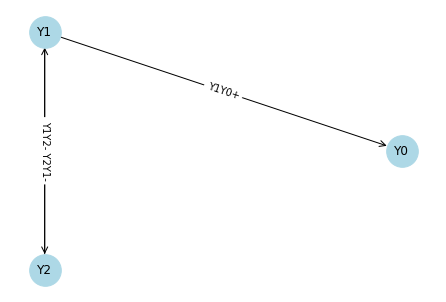

In [101]:

# Create a directed graph
G = nx.DiGraph()

delimiter = " "  # Splitting the string based on space

y_nodes = vary_str.split(delimiter)[1:]

# Add nodes to the graph
G.add_nodes_from(y_nodes)

# Add edges to the graph
G.add_edges_from(edge_list_Nx)

edge_labels = {k: v for k, v in zip(edge_list_Nx, edge_labels_Nx)}

# Draw the network diagram
pos = nx.circular_layout(G)  # Calculate the node positions
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000,
        arrowstyle='->', arrowsize=15)

# Customize the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the diagram
plt.show()

In [94]:
d = [0, 0, 0]

In [95]:
t_span = np.linspace(0.0, 10.0, 2000)  # Start and end times
# Solve the combined SDE system
solution = ddeint(feedbackSystem, lambda t: initial_conditions, t_span, \
                  fargs = (m, noise_std,theta_rep,n_max,n,edge_list,edge_loc,thetaB_rep,meanB_10,d, ))


In [96]:
Y_sim = solution
t_sim = t_span

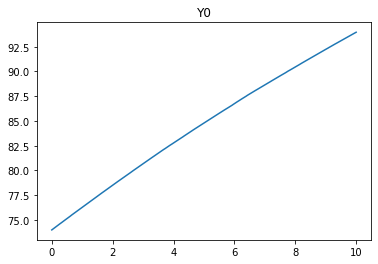

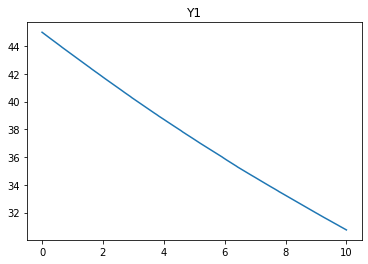

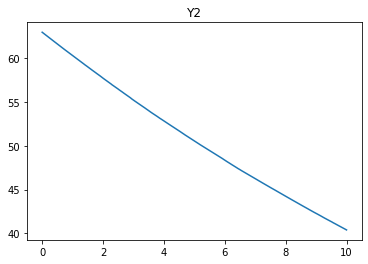

In [97]:
k = 0
for o in np.arange(-m,0):
    fig, ax = plt.subplots()
    ax.plot(t_sim, Y_sim[:,o])
    title = 'Y' + str(k)
    plt.title(title)
    k+=1

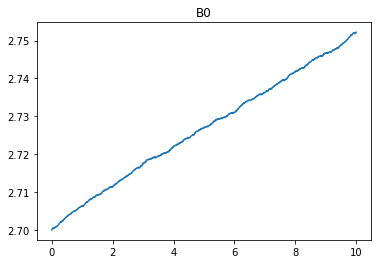

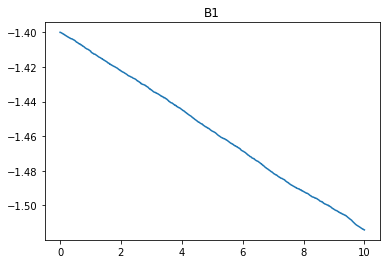

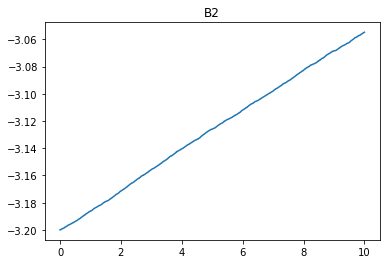

In [98]:
k = 0
for o in np.arange(0,n):
    fig, ax = plt.subplots()
    ax.plot(t_sim, Y_sim[:,o])
    title = 'B' + str(k)
    plt.title(title)
    k+=1

## Examples 

In [ ]:
from pylab import array, linspace, subplots
from pylab import cos, linspace, subplots

/Users/theok/miniforge3/lib/python3.9/site-packages/ddeint/ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


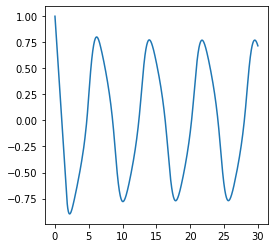

In [3]:

def model(Y, t):
    return -Y(t - 3 * cos(Y(t)) ** 2)


def values_before_zero(t):
    return 1


tt = linspace(0, 30, 2000)
yy = ddeint(model, values_before_zero, tt)

fig, ax = subplots(1, figsize=(4, 4))
ax.plot(tt, yy)
ax.figure.savefig("variable_delay.jpeg")

Computing for d=0.00
Computing for d=0.20
Computing for d=0.40
Computing for d=0.60


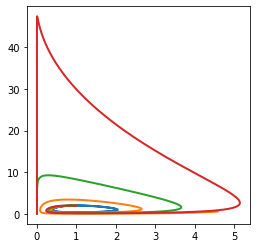

In [4]:
def model(Y, t, d):
    x, y = Y(t)
    xd, yd = Y(t - d)
    return array([0.5 * x * (1 - yd), -0.5 * y * (1 - xd)])


g = lambda t: array([1, 2])
tt = linspace(2, 30, 20000)

fig, ax = subplots(1, figsize=(4, 4))

for d in [0, 0.2, 0.4, 0.6]:
    print("Computing for d=%.02f" % d)
    yy = ddeint(model, g, tt, fargs=(d,))
    # WE PLOT X AGAINST Y
    ax.plot(yy[:, 0], yy[:, 1], lw=2, label="delay = %.01f" % d)

ax.figure.savefig("lotka.jpeg")

/Users/theok/miniforge3/lib/python3.9/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


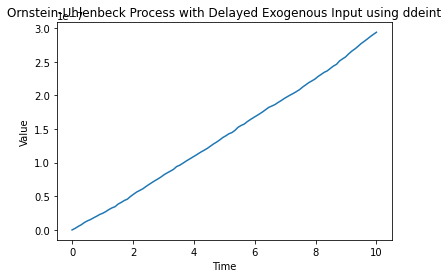

In [8]:
# Define the Ornstein-Uhlenbeck process with delayed exogenous input
def ornstein_uhlenbeck_delayed(Y, t, theta, mu, sigma, eta, delay):
    y, y_delayed = Y(t), Y(t - delay) if t >= delay else 0.0
    dy_dt = -theta * (y - mu) + sigma * np.random.randn() + eta * y_delayed
    return dy_dt

# Set up the DDE problem
def dde_problem():
    # Parameters for the Ornstein-Uhlenbeck process
    theta = 0.5  # Rate of mean reversion
    mu = 1.0  # Mean or equilibrium value
    sigma = 0.1  # Volatility

    # Parameters for the delayed exogenous input
    eta = 0.2  # Influence of the delayed input
    delay = 2.0  # Time delay

    return theta, mu, sigma, eta, delay

def values_before_zero(t):
    return 0

# Solve the DDE problem
def solve_dde():
    theta, mu, sigma, eta, delay = dde_problem()
    t = np.linspace(0, 10, 100)  # Time grid
    y0 = [0.0]  # Initial condition

    # Solve the DDE using ddeint
    solution = ddeint(ornstein_uhlenbeck_delayed, values_before_zero, t, fargs=(theta, mu, sigma, eta, delay))

    return t, solution



# Main function
if __name__ == "__main__":
    t, values = solve_dde()

    # Plot the results
    plt.plot(t, values)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Ornstein-Uhlenbeck Process with Delayed Exogenous Input using ddeint')
    plt.show()


## Extra codes

### Store all symbolic expression together before printing

In [71]:
'''
t = symbols('t')
w = symbols('Wdt')
# Edges
var_str = ''
for i in range(n):  # the first n variables are the coupling
    var_str += ' B' + str(i)
    
B_ = symbols(var_str, cls=Function)
for j, var_temp in evaluate(B_):
    with evaluate(False):
        pprint(Eq(B_[j](t).diff(t), -1/thetaB_rep[i] * (B_[j](t) - meanB_10[j]/10) + w, simplify = False))
        '''

"\nt = symbols('t')\nw = symbols('Wdt')\n# Edges\nvar_str = ''\nfor i in range(n):  # the first n variables are the coupling\n    var_str += ' B' + str(i)\n    \nB_ = symbols(var_str, cls=Function)\nfor j, var_temp in evaluate(B_):\n    with evaluate(False):\n        pprint(Eq(B_[j](t).diff(t), -1/thetaB_rep[i] * (B_[j](t) - meanB_10[j]/10) + w, simplify = False))\n        "